In [226]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [228]:
df = pd.read_csv("./Mall_Customers.csv")
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Spending Score is assigned to the customer based on some parameters like customer behavior and purchasing data. 

In [229]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [230]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [231]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [232]:
df.columns = ["ID","Gender" ,"Age","Income","Spending Score"]

In [233]:
df

,ID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


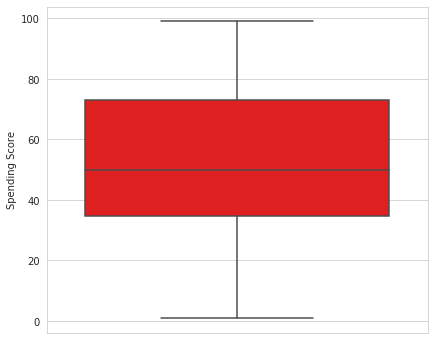

In [234]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score"], color="red")

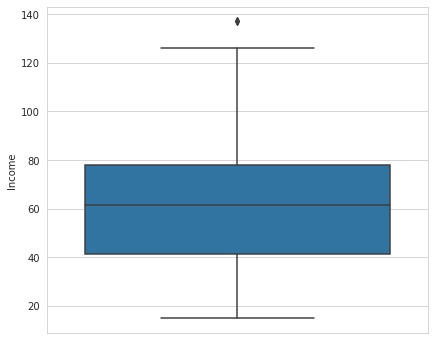

In [235]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"])

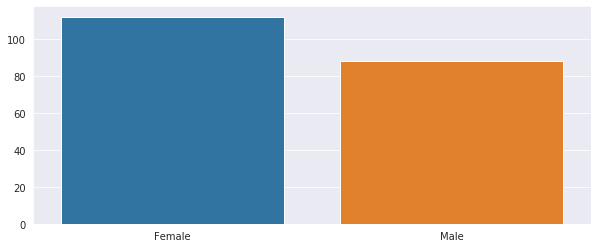

In [236]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

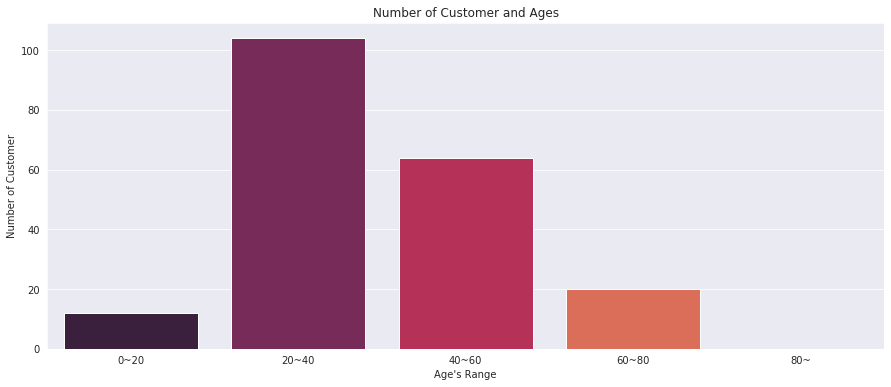

In [237]:
age_under20 = df.Age[(df.Age < 20)]
age20_40 = df.Age[(df.Age < 40) & (df.Age >= 20)]
age40_60 = df.Age[(df.Age < 60) & (df.Age >= 40)]
age60_80 = df.Age[(df.Age < 80) & (df.Age >= 60)]
age_over80 = df.Age[(df.Age >= 80)]
x = ["0~20","20~40","40~60","60~80","80~"]
y = [len(age_under20.values),len(age20_40.values),len(age40_60.values),len(age60_80.values),len(age_over80.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age's Range")
plt.ylabel("Number of Customer")
plt.show()

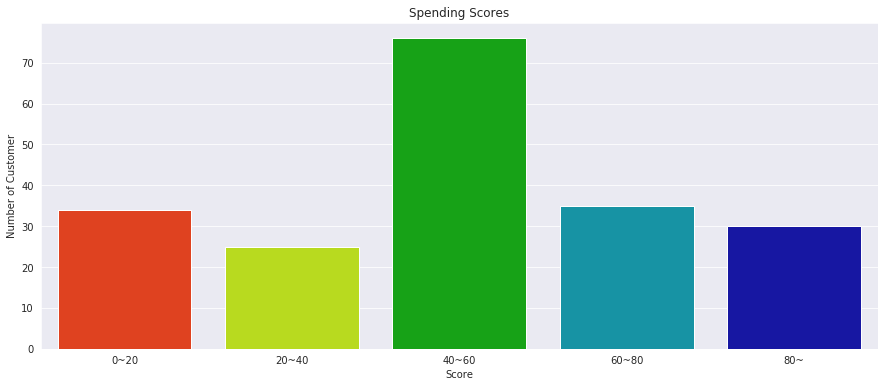

In [238]:
ss0_20 = df["Spending Score"][(df["Spending Score"] >= 0) & (df["Spending Score"] <20)]
ss20_40 = df["Spending Score"][(df["Spending Score"] >= 20) & (df["Spending Score"] < 40)]
ss40_60 = df["Spending Score"][(df["Spending Score"] >= 40) & (df["Spending Score"] < 60)]
ss60_80 = df["Spending Score"][(df["Spending Score"] >= 60) & (df["Spending Score"] < 80)]
ss80 = df["Spending Score"][(df["Spending Score"] >= 80)]
ssx = ["0~20", "20~40", "40~60", "60~80", "80~"]
ssy = [len(ss0_20.values), len(ss20_40.values), len(ss40_60.values), len(ss60_80.values), len(ss80.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

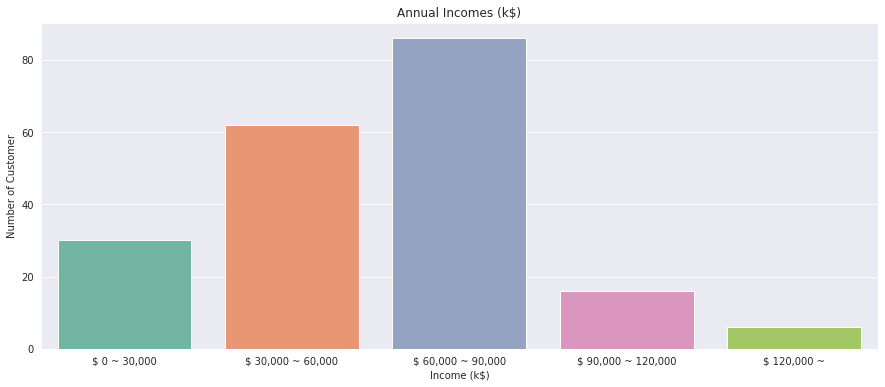

In [239]:
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"]< 30)]
ai30_60 = df["Income"][(df["Income"] >= 30) & (df["Income"]<60)]
ai60_90 = df["Income"][(df["Income"] >= 60) & (df["Income"] < 90)]
ai90_120 = df["Income"][(df["Income"] >= 90) & (df["Income"] < 120)]
ai120 = df["Income"][(df["Income"] >= 120)]
aix = ["$ 0 ~ 30,000", "$ 30,000 ~ 60,000", "$ 60,000 ~ 90,000", "$ 90,000 ~ 120,000", "$ 120,000 ~"]
aiy = [len(ai0_30.values), len(ai30_60.values), len(ai60_90.values), len(ai90_120.values), len(ai120.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes (k$)")
plt.xlabel("Income (k$)")
plt.ylabel("Number of Customer")
plt.show()

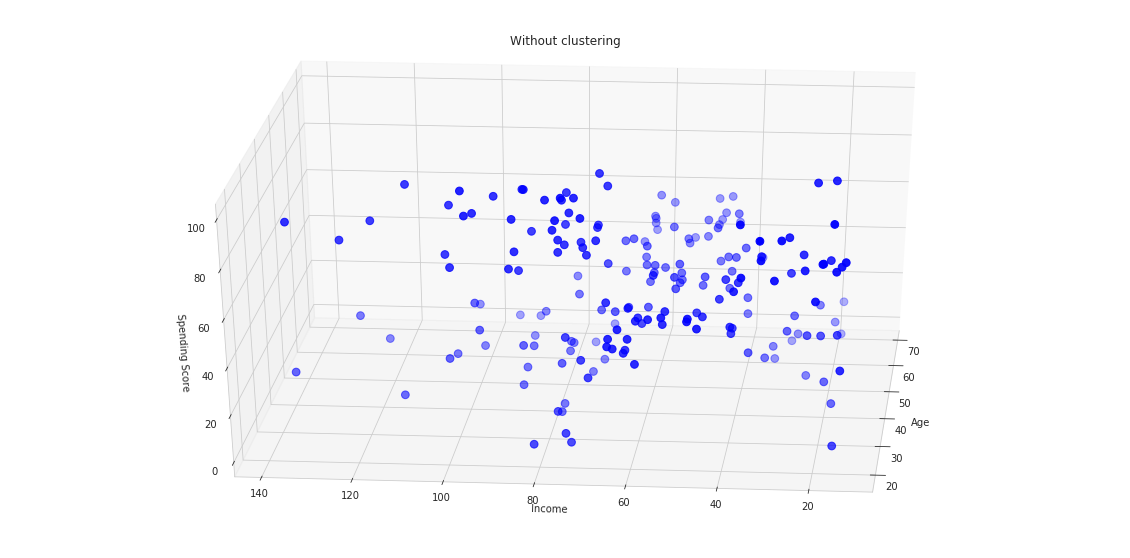

In [240]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Income"], df["Spending Score"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title('Without clustering')
ax.set_zlabel('Spending Score')
plt.show()

# Elbow method
## 此種方法適用於K值相對較小的情況，當選擇的k值小於真正的時，k每增加1，cost值就會大幅的減小；當選擇的k值大於真正的K時，k每增加1，cost值的變化就不會那麼明顯。這樣，正確的k值就會在這個轉捩點，類似elbow的地方

In [213]:
df.iloc[:,2:]

,Age,Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


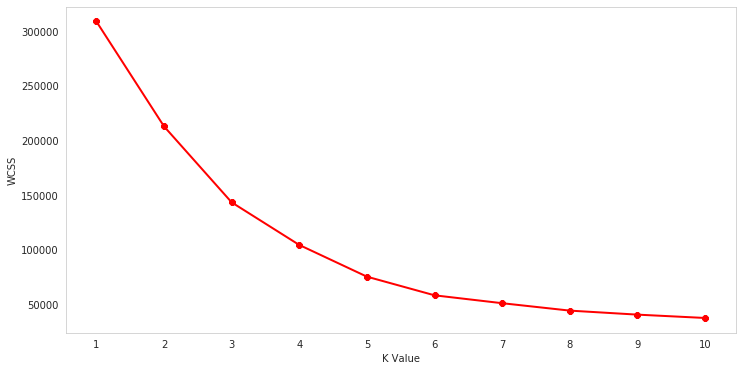

In [214]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [217]:
df.iloc[:,2:]

,Age,Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## 根據elbow method , 選擇5為k值

In [218]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,2:])
df["label"] = clusters
clusters

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [219]:
df.iloc[:,2:]

,Age,Income,Spending Score,label
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


In [220]:
km.cluster_centers_

array([[25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348]])

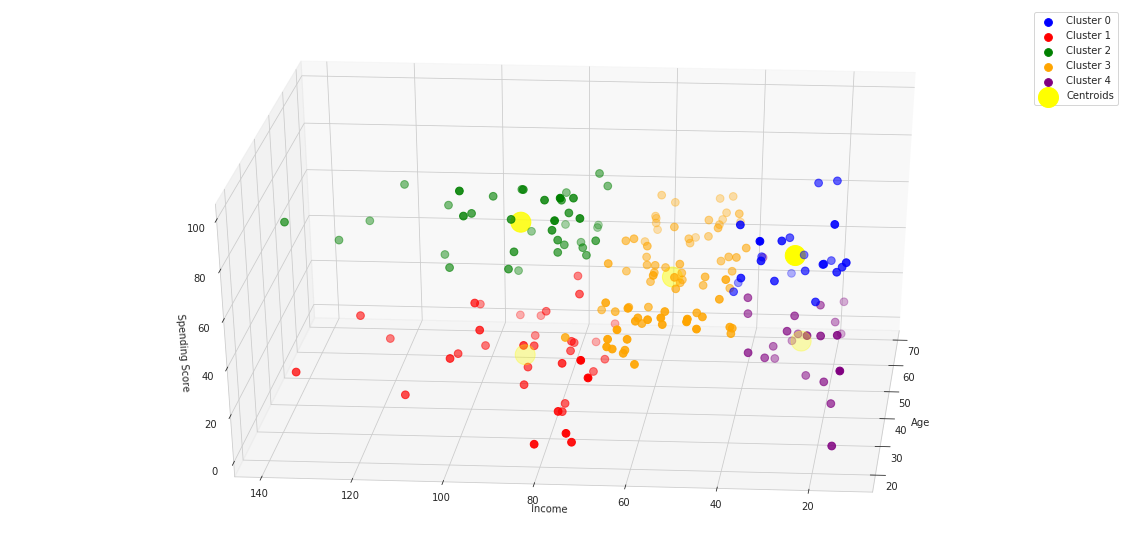

In [222]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["Spending Score"][df.label == 0], c='blue', s=60 ,label = 'Cluster 0')
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["Spending Score"][df.label == 1], c='red', s=60, label = 'Cluster 1')
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["Spending Score"][df.label == 2], c='green', s=60, label = 'Cluster 2')
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["Spending Score"][df.label == 3], c='orange', s=60, label = 'Cluster 3')
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["Spending Score"][df.label == 4], c='purple', s=60, label = 'Cluster 4')
ax.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],km.cluster_centers_[:, 2], s = 400, c = 'yellow', label = 'Centroids')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Spending Score')
plt.legend()
plt.show()

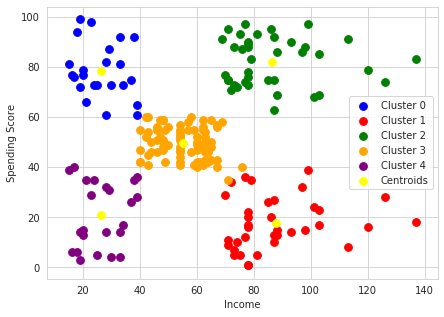

In [223]:
plt.figure(figsize=(7,5))
plt.scatter(df["Income"][df.label == 0], df["Spending Score"][df.label == 0], c='blue', s=60 ,label = 'Cluster 0')
plt.scatter(df["Income"][df.label == 1], df["Spending Score"][df.label == 1], c='red', s=60, label = 'Cluster 1')
plt.scatter(df["Income"][df.label == 2], df["Spending Score"][df.label == 2], c='green', s=60, label = 'Cluster 2')
plt.scatter(df["Income"][df.label == 3], df["Spending Score"][df.label == 3], c='orange', s=60, label = 'Cluster 3')
plt.scatter(df["Income"][df.label == 4], df["Spending Score"][df.label == 4], c='purple', s=60, label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], s = 60, c = 'yellow', label = 'Centroids')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

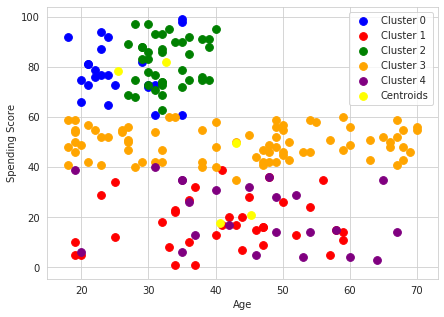

In [224]:
plt.figure(figsize=(7,5))
plt.scatter(df["Age"][df.label == 0], df["Spending Score"][df.label == 0], c='blue', s=60 ,label = 'Cluster 0')
plt.scatter(df["Age"][df.label == 1], df["Spending Score"][df.label == 1], c='red', s=60, label = 'Cluster 1')
plt.scatter(df["Age"][df.label == 2], df["Spending Score"][df.label == 2], c='green', s=60, label = 'Cluster 2')
plt.scatter(df["Age"][df.label == 3], df["Spending Score"][df.label == 3], c='orange', s=60, label = 'Cluster 3')
plt.scatter(df["Age"][df.label == 4], df["Spending Score"][df.label == 4], c='purple', s=60, label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 2], s = 60, c = 'yellow', label = 'Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

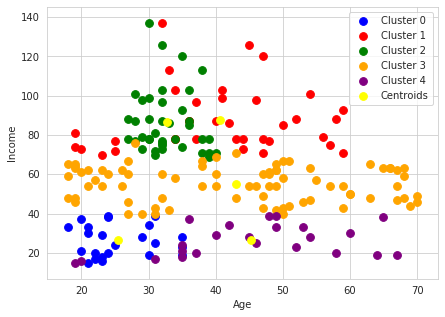

In [225]:
plt.figure(figsize=(7,5))
plt.scatter(df["Age"][df.label == 0], df["Income"][df.label == 0], c='blue', s=60 ,label = 'Cluster 0')
plt.scatter(df["Age"][df.label == 1], df["Income"][df.label == 1], c='red', s=60, label = 'Cluster 1')
plt.scatter(df["Age"][df.label == 2], df["Income"][df.label == 2], c='green', s=60, label = 'Cluster 2')
plt.scatter(df["Age"][df.label == 3], df["Income"][df.label == 3], c='orange', s=60, label = 'Cluster 3')
plt.scatter(df["Age"][df.label == 4], df["Income"][df.label == 4], c='purple', s=60, label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 60, c = 'yellow', label = 'Centroids')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()